# Detecting Well Locations

We want to use `opencv` for this, since it is reliable and easy to implement. It is also available in Python as well as C++. This means that the code and algorithms we use can be scaled and adapted easily based on our needs.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Processing

In [2]:
# Read in the image
img = cv2.imread(r"C:\Users\mihir\OneDrive\Programs\Capstone\image.png")

In [3]:
# Resize the image (3x the width) to make the wells circular
resized = cv2.resize(img, (img.shape[1]*3, img.shape[0]))

In [4]:
# Add blur and convert it to grayscale
resized = cv2.medianBlur(resized,5)
gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

In [5]:
gray.shape

(2107, 1152)

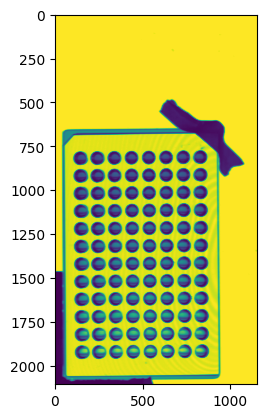

In [6]:
plt.imshow(gray)

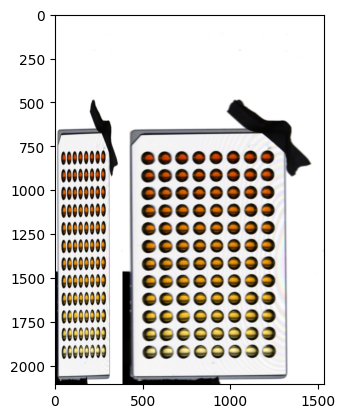

In [7]:
plt.imshow( np.hstack([img, resized]) )

## Circle Detection using `HoughCircles`

In [8]:
# Hough Circle Transform
circles = cv2.HoughCircles(
    image=gray,
    method=cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=30,
    maxRadius=50
)

In [9]:
circles

array([[[ 336.5,  919.5,   37.2],
        [ 537.5, 1520.5,   37.1],
        [ 735.5, 1719.5,   37.9],
        [ 534.5, 1219.5,   37.3],
        [ 343.5, 1823.5,   37.7],
        [ 436.5, 1119.5,   37.4],
        [ 343.5, 1723.5,   37.9],
        [ 629.5,  816.5,   37.3],
        [ 631.5, 1016.5,   37.1],
        [ 729.5, 1015.5,   37.4],
        [ 345.5, 1923.5,   37.8],
        [ 733.5, 1518.5,   37.8],
        [ 639.5, 1921.5,   37.1],
        [ 436.5, 1220.5,   37.2],
        [ 734.5, 1618.5,   37.2],
        [ 732.5, 1318.5,   37.3],
        [ 538.5, 1621.5,   37.2],
        [ 630.5,  916.5,   37. ],
        [ 440.5, 1621.5,   36.9],
        [ 443.5, 1922.5,   37.1],
        [ 736.5, 1819.5,   37.9],
        [ 338.5, 1221.5,   37.2],
        [ 635.5, 1419.5,   37. ],
        [ 246.5, 1724.5,   37.7],
        [ 142.5,  821.5,   38. ],
        [ 833.5, 1718.5,   37.7],
        [ 339.5, 1321.5,   37.4],
        [ 634.5, 1319.5,   37.5],
        [ 731.5, 1217.5,   38. ],
        [ 148.

In [10]:
# Convert the circles array to 16-bit integer (not 8 bit because we want values greater than 255)
circles = np.uint16(np.around(circles)) # we use circles[0] since the circles array has
                                        # an extra set of [] outside of the relevant 
                                        # i.e. [ [data] ]

## Drawing the Circles

In [11]:
# reset cimg to be the original color image (useful for running the loop multiple times)
drawing = resized.copy()

# Draw each circle and its center
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(drawing,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(drawing,(i[0],i[1]),2,(0,0,255),3)

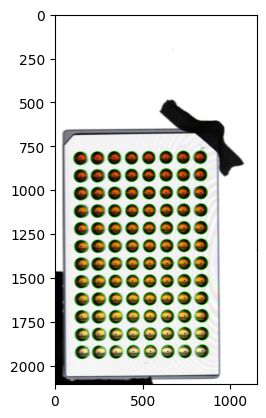

In [12]:
# Display the circles
plt.imshow(drawing)